In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (12, 6)
#os.chdir('/Users/Jonathan/citiBike_NYC')

sns.set(rc={"figure.figsize": (6, 6)})
import warnings; warnings.filterwarnings('ignore')

#### Download all of the data for 2014 & 2015

In [4]:
# Read data from citibikenyc website (https://www.citibikenyc.com/system-data)
from zipfile import ZipFile
from StringIO import StringIO
import urllib2

months = [("%02d" % i) for i in range(1,13)]
dfs = []
for i in months:
    url = "https://s3.amazonaws.com/tripdata/2014" +i + "-citibike-tripdata.zip"
    print url    
    r = urllib2.urlopen(url).read()
    file = ZipFile(StringIO(r))
    monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
    dfs.append(pd.read_csv(monthlyTripData))
    
months = [("%02d" % i) for i in range(1,12)]
dfs = []
for i in months:
    url = "https://s3.amazonaws.com/tripdata/2015" +i + "-citibike-tripdata.zip"
    print url    
    r = urllib2.urlopen(url).read()
    file = ZipFile(StringIO(r))
    monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
    dfs.append(pd.read_csv(monthlyTripData))

https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201504-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201505-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201506-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201507-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201508-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201509-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201510-citibike-tripdata.zip
https://s3.amazonaws.com/tripdata/201511-citibike-tripdata.zip


In [3]:
# # Load all DFs
# import pickle

# with open('data/objs.pickle') as f:
#     dfs = pickle.load(f)

In [ ]:
# # Save all DFs
# import pickle

# with open('objs.pickle', 'w') as f:
#     pickle.dump([dfs], f)

In [3]:
# Read data for all of 2014
months = [("%02d" % i) for i in range(1,13)]
dfs2014 = []
for i in months[:8]:
    file = "2014-" +i +" - Citi Bike trip data.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2014.append(monthlyTripData)
for i in months[8:13]:
    file = "2014" +i +"-citibike-tripdata.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2014.append(monthlyTripData)

2014-01 - Citi Bike trip data.csv
2014-02 - Citi Bike trip data.csv
2014-03 - Citi Bike trip data.csv
2014-04 - Citi Bike trip data.csv
2014-05 - Citi Bike trip data.csv
2014-06 - Citi Bike trip data.csv
2014-07 - Citi Bike trip data.csv
2014-08 - Citi Bike trip data.csv
201409-citibike-tripdata.csv
201410-citibike-tripdata.csv
201411-citibike-tripdata.csv
201412-citibike-tripdata.csv


In [4]:
# Read data for all of 2015
months = [("%02d" % i) for i in range(1,12)]
dfs2015 = []
for i in months:
    file = "2015" +i +"-citibike-tripdata.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2015.append(monthlyTripData)

201501-citibike-tripdata.csv
201502-citibike-tripdata.csv
201503-citibike-tripdata.csv
201504-citibike-tripdata.csv
201505-citibike-tripdata.csv
201506-citibike-tripdata.csv
201507-citibike-tripdata.csv
201508-citibike-tripdata.csv
201509-citibike-tripdata.csv
201510-citibike-tripdata.csv
201511-citibike-tripdata.csv


In [6]:
whos

Variable          Type             Data/Info
--------------------------------------------
calendar          module           <module 'calendar' from '<...>/python2.7/calendar.pyc'>
current_palette   _ColorPalette    [(0.2980392156862745, 0.4<...>6275, 0.803921568627451)]
dfs               list             n=1
f                 file             <closed file 'data/objs.p<...>de 'r' at 0x7f3859a9c8a0>
np                module           <module 'numpy' from '/op<...>ages/numpy/__init__.pyc'>
os                module           <module 'os' from '/opt/c<...>da/lib/python2.7/os.pyc'>
pd                module           <module 'pandas' from '/o<...>ges/pandas/__init__.pyc'>
pickle            module           <module 'pickle' from '/o<...>ib/python2.7/pickle.pyc'>
plt               module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
re                module           <module 're' from '/opt/c<...>da/lib/python2.7/re.pyc'>
sns               module           <module 'seaborn'

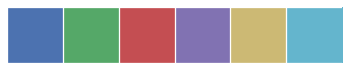

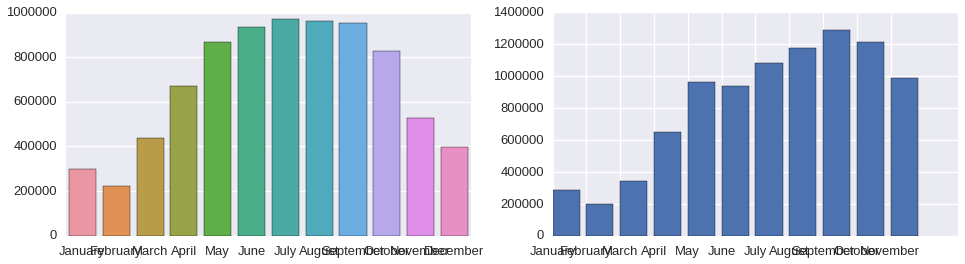

In [6]:
import calendar
sns.set()
sns.set_context("talk")
current_palette = sns.color_palette()
sns.palplot(current_palette)

len(dfs2014) # 11
dfs2014[0] #data for January
month_names = [calendar.month_name[i+1] for i in range(len(dfs2014))]
plt.figure(figsize=(16, 4))

plt.subplot(121)
sns.barplot(range(len(dfs2014)),[len(dfs2014[i]) for i in range(len(dfs2014))])
plt.xticks(range(len(dfs2014)),month_names)

month_names = [calendar.month_name[i+1] for i in range(len(dfs2015))]
plt.subplot(122)
plt.bar(range(len(dfs2015)),[len(dfs2015[i]) for i in range(len(dfs2015))])
plt.xticks(range(len(dfs2015)),month_names)
plt.show()

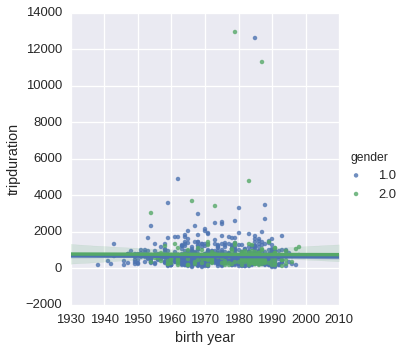

In [11]:
# plotting some tripduration by gender (Jan 2015). Removing 0 gender (missing data)
data = dfs2015[0][(dfs2015[0]['gender']!=0) & (dfs2015[0]['birth year']>1930)]
data = data.ix[np.random.random_integers(0,len(data),1000)]
sns.lmplot(x='birth year', y='tripduration', hue='gender', data=data)

In [12]:
# Any missing values? print column names with NaNs
[x +"_" +str(i) for i in range(0,12) for x in dfs2014[i] if any(dfs2014[i][x].isnull())]

['birth year_8', 'birth year_9', 'birth year_10', 'birth year_11']

In [13]:
# print column names with NaNs
[x +"_" +str(i) for i in range(0,11) for x in dfs2015[i] if any(dfs2015[i][x].isnull())]

['birth year_0',
 'birth year_1',
 'birth year_2',
 'birth year_3',
 'birth year_4',
 'birth year_5',
 'birth year_6',
 'birth year_7',
 'birth year_8',
 'birth year_9',
 'birth year_10']

In [18]:
# Parse dates
from datetime import datetime

a = dfs2015[4].starttime[0]
print a
#datetime.strptime(a,'%m/%d/%Y')
#datetime.datetime(2010,1,1,0,0)
b = datetime.strptime(a,"%m/%d/%Y %H:%M:%S")
b

5/1/2015 00:00:11


datetime.datetime(2015, 5, 1, 0, 0, 11)

In [23]:
dates = [datetime.strptime(x,"%m/%d/%Y %H:%M:%S") for x in dfs2015[4].starttime]
dates[:10]

#can also use:
from dateutil.parser import parse
[parse(x) for x in data.starttime]

AttributeError: 'float' object has no attribute 'read'

In [ ]:
# from dateutil.parser import parse
# new = pd.Series(np.random.randn(100), index = pd.date_range(parse(data.starttime[0]),periods = 100))
# new.plot()

In [27]:
tripData = dfs2015[4]

In [28]:
# How many bikes are there?
len((tripData.bikeid.unique()))

5476

In [29]:
# Proportion of male / female (0 is unknown)
(tripData.gender.value_counts() / tripData.gender.shape[0] * 100).round(2)

1    63.20
2    19.35
0    17.45
dtype: float64

In [30]:
# Proportion of Subscribers
(tripData.usertype.value_counts() / tripData.usertype.shape[0] * 100).round(2)

Subscriber    82.58
Customer      17.42
dtype: float64

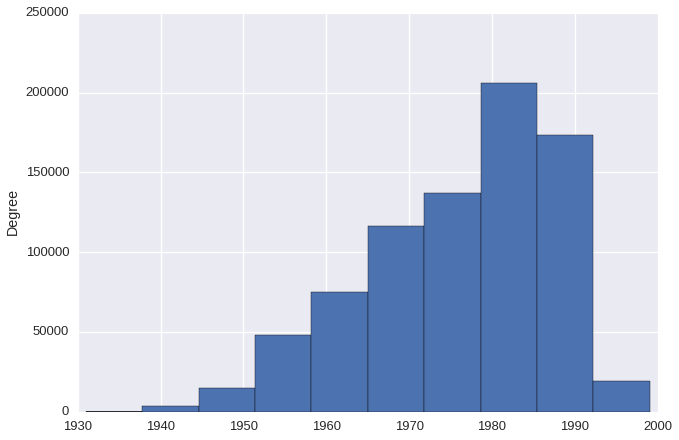

In [31]:
# tripData['birth year'].plot(kind='hist')
tripData[tripData['birth year'] > 1930]['birth year'].plot(kind = 'hist')

In [32]:
# Enter trip duration:
trip_duration_in_minutes = 10

trip_duration = trip_duration_in_minutes * 60.0
x = tripData[tripData.tripduration > trip_duration].shape[0] / float(tripData.shape[0]) * 100
x = round(x,2)
print str(x) +" percent of trips were longer than " + str(trip_duration_in_minutes) +" minutes"

56.23 percent of trips were longer than 10 minutes


In [33]:
#------------------------------------------------------------------------------------------------#

In [34]:
# Get only the first 100 rows
data = tripData.ix[:99,:].copy()
data

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956,2
5,359,5/1/2015 00:01:07,5/1/2015 00:07:07,439,E 4 St & 2 Ave,40.726281,-73.989780,302,Avenue D & E 3 St,40.720828,-73.977932,17406,Subscriber,1961,1
6,236,5/1/2015 00:01:05,5/1/2015 00:05:02,401,Allen St & Rivington St,40.720196,-73.989978,438,St Marks Pl & 1 Ave,40.727791,-73.985649,15005,Subscriber,1971,1
7,1991,5/1/2015 00:01:16,5/1/2015 00:34:28,532,S 5 Pl & S 4 St,40.710451,-73.960876,529,W 42 St & 8 Ave,40.757570,-73.990985,15566,Subscriber,1993,1
8,101,5/1/2015 00:01:59,5/1/2015 00:03:40,320,Leonard St & Church St,40.717571,-74.005549,276,Duane St & Greenwich St,40.717488,-74.010455,19245,Subscriber,1958,1
9,1070,5/1/2015 00:01:55,5/1/2015 00:19:45,297,E 15 St & 3 Ave,40.734232,-73.986923,316,Fulton St & William St,40.709560,-74.006536,18382,Subscriber,1965,1


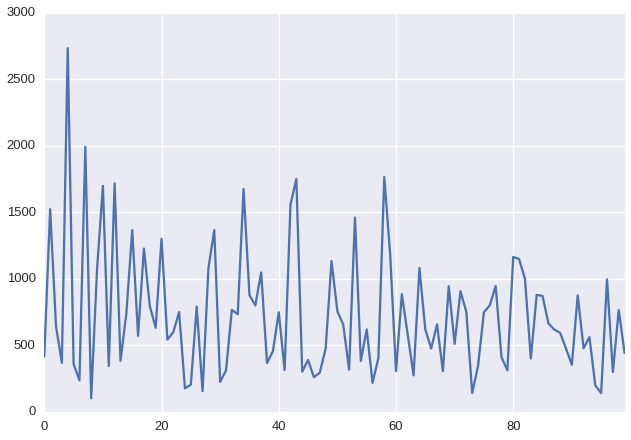

In [35]:
data.tripduration.plot()

In [36]:
data.groupby('gender').tripduration.sum()

gender
0     7531
1    51229
2    14235
Name: tripduration, dtype: int64

In [ ]:
# url = 'https://www.citibikenyc.com/stations/json'
# all_stations = pd.read_json(url)['stationBeanList']

# # all_stations = all_stations.apply(lambda x: x['stationName'])

# # # decode html
# # html_parser = HTMLParser.HTMLParser()
# # my_unique_stations_decoded = my_unique_stations.apply(html_parser.unescape)

# # # exclude visited stations
# # not_visited_station = lambda x: x not in my_unique_stations_decoded.values
# # not_visited_stations = all_stations.apply(not_visited_station)

In [ ]:
import urllib2
url = 'https://www.citibikenyc.com/stations/json'
request = urllib2.Request(url)
response = urllib2.urlopen(request)
jsonData = response.read()

In [ ]:
# Anoter way of reading the data
jsonData = pd.read_json(url)
jsonData.ix[:,1][0]['id']

In [ ]:
import urllib2
from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize

url = 'https://www.citibikenyc.com/stations/json'
all_stations = pd.read_json(url)['stationBeanList']
x = urllib2.urlopen(url)

In [ ]:
# Read Json using the requests package
import requests
r = requests.get(url)
r.text
r.json()
r.json().keys()
r.json()['executionTime']
r.json()['stationBeanList']
len(r.json()['stationBeanList']) # 507 docks
r.json()['stationBeanList'] [0] # First key/station
from pandas.io.json import json_normalize
df = json_normalize(r.json()['stationBeanList'])

print r.json()['executionTime']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df['availableBikes'])
ax1.set_title('availableBikes')
ax2.hist(df['totalDocks'])
ax2.set_title('totalDocks')

df.shape
df.columns
df.statusValue.unique()  # array([u'In Service', u'Not In Service'], dtype=object)
len(df[df.statusValue=='Not In Service']) / float(len(df[df.statusValue=='In Service']))